# Author: Laura C. Larregui
# Purpose: Lab Week 3

## Instructions
Step 1: Import necessary libraries

In [ ]:
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt #2D plotting
import seaborn as sns #seaborn for plotting
from sklearn.linear_model import LinearRegression

Step 2: Import dataset 

In [ ]:
# read in Coaches data
coaches = pd.read_csv("Coaches9.csv")

Step 3: Data cleanup

In [ ]:
# shape and data types of the data
print("What are the dimensions of the dataset?\n",coaches.shape)
print("What are the datatypes for each variable?\n",coaches.dtypes)
# compute descriptive statistics 
print(coaches.describe())
# % of missing.
for col in coaches.columns:
    pct_missing = np.mean(coaches[col].isnull())
    print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))

What are the dimensions of the dataset?
 (129, 9)
What are the datatypes for each variable?
 School          object
Conference      object
Coach           object
SchoolPay       object
TotalPay        object
Bonus           object
BonusPaid       object
AssistantPay    object
Buyout          object
dtype: object
                  School Conference        Coach  ... BonusPaid AssistantPay Buyout
count                129        129          129  ...       129          129    129
unique               129         11          129  ...        51            1    102
top     Middle Tennessee    Big Ten  Gus Malzahn  ...        --          $0      --
freq                   1         14            1  ...        41          129     22

[4 rows x 9 columns]
Are there any null values?
 School - 0.0%
Are there any null values?
 Conference - 0.0%
Are there any null values?
 Coach - 0.0%
Are there any null values?
 SchoolPay - 0.0%
Are there any null values?
 TotalPay - 0.0%
Are there any null values?

There are no missing values for each attribute. Nevertheless, there are some columns that need to be excluded from the analysis since they are of no relevant use (SchoolPay, AssistantPay, and Bonus). Plus, for some attributes their datatypes need to be changed.

In [ ]:
cols_to_drop = ['SchoolPay', 'Bonus','AssistantPay']
coaches = coaches.drop(cols_to_drop, axis=1)
print("What are the dimensions of the dataset?\n",coaches.shape)
#Reference for the following code: 
# Mattiff, M. (2019). Cleaning Up Currency Data with pandas. 
# Retrieved October 10, 2020 from https://pbpython.com/currency-cleanup.html
# Set a function to clean the currency data
def currency_clean(data_column):
    col = data_column.str.replace(',','')
    col = col.str.replace('$','')
    col = col.str.replace(" ","")
    col = col.str.replace("--","0")
    col = col.fillna(0)
    col = col.astype(float)
    return col

# Run the 'currency_clean' function for columns of interest
coaches['TotalPay'] = currency_clean(coaches['TotalPay'])
coaches['BonusPaid'] = currency_clean(coaches['BonusPaid'])
coaches['Buyout'] = currency_clean(coaches['Buyout']) 

#print("Data Sample\n",coaches.head())

What are the dimensions of the dataset?
 (129, 6)


Step 4: Develop an additional vector for each school using last year’s record.


In [ ]:
# WinLossRate dataset obtained from:
# TeamRanking. (2019). College Football Team Win Trends - All Games, 2019. 
# Retrieved October 13, 2020 from https://betiq.teamrankings.com/college-football/betting-trends/win-loss-records/?season=2019
# GradRate dataset obtained from:
# NCAA. (2019). Graduation Success Rate Retrieved October 13, 2020 from https://web3.ncaa.org/aprsearch/gsrsearch
# Stadium dataset obtained from:
# College Grid Irons. (n.d). College Football Stadium Comparisons. 
# Retrieved October 13, 2020 from https://www.collegegridirons.com/comparisons-by-capacity/
# Assistant dataset obtained from:
# USA Today. (2019). 2019 NCAAF ASSISTANT COACHES SALARIES. 
# Retrieved October 16, 2020 from https://sports.usatoday.com/ncaa/salaries/football/assistant

wl = pd.read_csv("WinLossRate.csv")#WinLossRate

wl.rename(columns={'Team':'School'},inplace=True)
wl.rename(columns={'Win %':'WinPercentage'},inplace=True)
wl.rename(columns={'ATS +/-':'ATS'},inplace=True)
wl.sort_values('School', inplace=True, ascending=True)

#changing format of winpercentage
wl["WinPercentage"] = wl['WinPercentage'].str.replace('%', '').str.strip()
wl["WinPercentage"] = wl.WinPercentage.astype(float)

# Fix Names
wl['School'] = wl['School'].str.replace('App State', 'Appalachian State').str.strip()
wl['School'] = wl['School'].str.replace('Arizona St', 'Arizona State').str.strip()
wl['School'] = wl['School'].str.replace('Arkansas St', 'Arkansas State').str.strip()
wl['School'] = wl['School'].str.replace('Boston Col', 'Boston College').str.strip()
wl['School'] = wl['School'].str.replace('BYU', 'Brigham Young').str.strip()
wl['School'] =wl['School'].str.replace('Bowling Grn', 'Bowling Green').str.strip()
wl['School'] = wl['School'].str.replace('Central FL', 'Central Florida').str.strip()
wl['School'] = wl['School'].str.replace('Central Mich', 'Central Michigan').str.strip()
wl['School'] = wl['School'].str.replace('Coastal Car', 'Coastal Carolina').str.strip()
wl['School'] = wl['School'].str.replace('Colorado St', 'Colorado State').str.strip()
wl['School'] = wl['School'].str.replace('E Carolina', 'East Carolina').str.strip()
wl['School'] = wl['School'].str.replace('E Michigan', 'Eastern Michigan').str.strip()
wl['School'] = wl['School'].str.replace('Fla Atlantic', 'Florida Atlantic').str.strip()
wl['School'] = wl['School'].str.replace('Florida Intl', 'Florida International').str.strip()
wl['School'] = wl['School'].str.replace('Florida St', 'Florida State').str.strip()
wl['School'] = wl['School'].str.replace('Fresno St', 'Fresno State').str.strip()
wl['School'] = wl['School'].str.replace('GA Southern', 'Georgia Southern').str.strip()
wl['School'] = wl['School'].str.replace('GA Tech', 'Georgia Tech').str.strip()
wl['School'] = wl['School'].str.replace('Kansas St', 'Kansas State').str.strip()
wl['School'] = wl['School'].str.replace('LA Lafayette', 'Louisiana-Lafayette').str.strip()
wl['School'] = wl['School'].str.replace('LA Tech', 'Louisiana Tech').str.strip()
wl['School'] = wl['School'].str.replace('LA Monroe', 'Louisiana-Monroe').str.strip()
wl['School'] = wl['School'].str.replace('Miami \\(FL\\)', 'Miami (Fla.)').str.strip()
wl['School'] = wl['School'].str.replace('Miami \\(OH\\)', 'Miami (Ohio)').str.strip()
wl['School'] = wl['School'].str.replace('Michigan St', 'Michigan State').str.strip()
wl['School'] = wl['School'].str.replace('Middle Tenn', 'Middle Tennessee').str.strip()
wl['School'] = wl['School'].str.replace('Miss State', 'Mississippi State').str.strip()
wl['School'] = wl['School'].str.replace('N Carolina', 'North Carolina').str.strip()
wl['School'] = wl['School'].str.replace('N Illinois', 'Northern Illinois').str.strip()
wl['School'] = wl['School'].str.replace('N Mex State', 'New Mexico State').str.strip()
wl['School'] = wl['School'].str.replace('NC State', 'North Carolina State').str.strip()
wl['School'] = wl['School'].str.replace('Oregon St', 'Oregon State').str.strip()
wl['School'] = wl['School'].str.replace('Oklahoma St', 'Oklahoma State').str.strip()
wl['School'] = wl['School'].str.replace('S Alabama', 'South Alabama').str.strip()
wl['School'] = wl['School'].str.replace('S Carolina', 'South Carolina').str.strip()
wl['School'] = wl['School'].str.replace('S Florida', 'South Florida').str.strip()
wl['School'] = wl['School'].str.replace('S Methodist', 'Southern Methodist').str.strip()
wl['School'] = wl['School'].str.replace('S Mississippi', 'Southern Miss').str.strip()
wl['School'] = wl['School'].str.replace('San Diego St', 'San Diego State').str.strip()
wl['School'] = wl['School'].str.replace('San Jose St', 'San Jose State').str.strip()
wl['School'] = wl['School'].str.replace('TX Christian', 'Texas Christian').str.strip()
wl['School'] = wl['School'].str.replace('TX-San Ant', 'Texas-San Antonio').str.strip()
wl['School'] = wl['School'].str.replace('TX El Paso', 'Texas-El Paso').str.strip()
wl['School'] = wl['School'].str.replace('U Mass', 'Massachusetts').str.strip()
wl['School'] = wl['School'].str.replace('UAB', 'Alabama at Birmingham').str.strip()
wl['School'] = wl['School'].str.replace('UNLV', 'Nevada-Las Vegas').str.strip()
wl['School'] = wl['School'].str.replace('USC', 'Southern California').str.strip()
wl['School'] = wl['School'].str.replace('VA Tech', 'Virginia Tech').str.strip()
wl['School'] = wl['School'].str.replace('W Kentucky', 'Western Kentucky').str.strip()
wl['School'] = wl['School'].str.replace('W Michigan', 'Western Michigan').str.strip()
wl['School'] = wl['School'].str.replace('W Virginia', 'West Virginia').str.strip()
wl['School'] = wl['School'].str.replace('Wash State', 'Washington State').str.strip()

grad = pd.read_csv("GradRate.csv")#GradRate

#Fixnames
grad['School'] = grad['School'].str.replace('The University of ', '').str.strip()
grad['School'] = grad['School'].str.replace('University of ', '').str.strip()
grad['School'] = grad['School'].str.replace('University at ', '').str.strip()
grad['School'] = grad['School'].str.replace(', the State New York', '').str.strip()
grad['School'] = grad['School'].str.replace('University', '').str.strip()
grad['School'] = grad['School'].str.replace('U.S. Air Force Academy', 'Air Force').str.strip()
grad['School'] = grad['School'].str.replace('U.S. Naval Academy', 'Navy').str.strip()
grad['School'] = grad['School'].str.replace('U.S. Military Academy', 'Army').str.strip()
grad['School'] = grad['School'].str.replace('Wisconsin-Madison', 'Wisconsin').str.strip()
grad['School'] = grad['School'].str.replace('Bowling Green State', 'Bowling Green').str.strip()
grad['School'] = grad['School'].str.replace('Arkansas, Fayetteville', 'Arkansas').str.strip()
grad['School'] = grad['School'].str.replace('The Ohio State', 'Ohio State').str.strip()
grad['School'] = grad['School'].str.replace('California, Berkeley', 'California').str.strip()
grad['School'] = grad['School'].str.replace('Colorado, Boulder', 'Colorado').str.strip()
grad['School'] = grad['School'].str.replace('California State , Fresno', 'Fresno State').str.strip()
grad['School'] = grad['School'].str.replace('Georgia Institute of Technology', 'Georgia Tech').str.strip()
grad['School'] = grad['School'].str.replace('Hawaii, Manoa', 'Hawaii').str.strip()
grad['School'] = grad['School'].str.replace('Illinois Urbana-Champaign', 'Illinois').str.strip()
grad['School'] = grad['School'].str.replace('Indiana , Bloomington', 'Indiana').str.strip()
grad['School'] = grad['School'].str.replace('Louisiana Monroe', 'Louisiana-Monroe').str.strip()
grad['School'] = grad['School'].str.replace('Louisiana State', 'LSU').str.strip()
grad['School'] = grad['School'].str.replace('Louisiana at Lafayette', 'Louisiana-Lafayette').str.strip()
grad['School'] = grad['School'].str.replace('Maryland, College Park', 'Maryland').str.strip()
grad['School'] = grad['School'].str.replace('Massachusetts, Amherst', 'Massachusetts').str.strip()
grad['School'] = grad['School'].str.replace('Miami \\(Florida\\)', 'Miami (Fla.)').str.strip()
grad['School'] = grad['School'].str.replace('Miami  \\(Ohio\\)', 'Miami (Ohio)').str.strip()
grad['School'] = grad['School'].str.replace('Middle Tennessee State', 'Middle Tennessee').str.strip()
grad['School'] = grad['School'].str.replace('Minnesota, Twin Cities', 'Minnesota').str.strip()
grad['School'] = grad['School'].str.replace('Missouri, Columbia', 'Missouri').str.strip()
grad['School'] = grad['School'].str.replace('Nebraska, Lincoln', 'Nebraska').str.strip()
grad['School'] = grad['School'].str.replace('Nevada, Las Vegas', 'Nevada-Las Vegas').str.strip()
grad['School'] = grad['School'].str.replace('Nevada, Reno', 'Nevada').str.strip()
grad['School'] = grad['School'].str.replace('Pennsylvania State', 'Penn State').str.strip()
grad['School'] = grad['School'].str.replace('Rutgers, The State New Jersey, New Brunswick', 'Rutgers').str.strip()
grad['School'] = grad['School'].str.replace('South Carolina, Columbia', 'South Carolina').str.strip()
grad['School'] = grad['School'].str.replace('Tennessee, Knoxville', 'Tennessee').str.strip()
grad['School'] = grad['School'].str.replace('Texas at Austin', 'Texas').str.strip()
grad['School'] = grad['School'].str.replace('Texas at El Paso', 'Texas-El Paso').str.strip()
grad['School'] = grad['School'].str.replace('Texas A&M , College Station', 'Texas A&M').str.strip()
grad['School'] = grad['School'].str.replace('Virginia Polytechnic Institute and State', 'Virginia Tech').str.strip()
grad['School'] = grad['School'].str.replace('North Carolina, Chapel Hill', 'North Carolina').str.strip()
grad['School'] = grad['School'].str.replace('California, Los Angeles', 'UCLA').str.strip()


stadiums = pd.read_csv("Stadium.csv")#Stadium

stadiums.rename(columns={'College':'School'},inplace=True)

#Fix names
stadiums['School'] = stadiums['School'].str.replace('BYU', 'Brigham Young').str.strip()
stadiums['School'] = stadiums['School'].str.replace('UNC Charlotte', 'Charlotte').str.strip()
stadiums['School'] = stadiums['School'].str.replace('Miami', 'Miami (Fla.)').str.strip()
stadiums['School'] = stadiums['School'].str.replace('Miami \\(Fla\\.\\)-OH', 'Miami (Ohio)').str.strip()
stadiums['School'] = stadiums['School'].str.replace('NC State', 'North Carolina State').str.strip()
stadiums['School'] = stadiums['School'].str.replace('SMU', 'Southern Methodist').str.strip()
stadiums['School'] = stadiums['School'].str.replace('Southern Miss', 'Southern Mississippi').str.strip()
stadiums['School'] = stadiums['School'].str.replace('TCU', 'Texas Christian').str.strip()
stadiums['School'] = stadiums['School'].str.replace('UAB', 'Alabama at Birmingham').str.strip()
stadiums['School'] = stadiums['School'].str.replace('UMass', 'Massachusetts').str.strip()
stadiums['School'] = stadiums['School'].str.replace('UNLV', 'Nevada-Las Vegas').str.strip()
stadiums['School'] = stadiums['School'].str.replace('USC', 'Southern California').str.strip()
stadiums['School'] = stadiums['School'].str.replace('UTEP', 'Texas-El Paso').str.strip()
stadiums['School'] = stadiums['School'].str.replace('UTSA', 'Texas-San Antonio').str.strip()

# Run the 'currency_clean' function for columns of interest
stadiums['Capacity'] = currency_clean(stadiums['Capacity'])

# Clean up check 
print(coaches.School.unique())
print(len(coaches.School),"schools")
print(wl.School.unique())
print(len(wl.School),"schools")
print(grad.School.unique())
print(len(grad.School),"schools")
print(stadiums.School.unique())
print(len(stadiums.School),"schools")

#print(wl.sample)
#print(grad.sample)
#print(stadiums.sample)


['Air Force' 'Akron' 'Alabama' 'Alabama at Birmingham' 'Appalachian State'
 'Arizona' 'Arizona State' 'Arkansas' 'Arkansas State' 'Army' 'Auburn'
 'Ball State' 'Baylor' 'Boise State' 'Boston College' 'Bowling Green'
 'Brigham Young' 'Buffalo' 'California' 'Central Florida'
 'Central Michigan' 'Charlotte' 'Cincinnati' 'Clemson' 'Coastal Carolina'
 'Colorado' 'Colorado State' 'Connecticut' 'Duke' 'East Carolina'
 'Eastern Michigan' 'Florida' 'Florida Atlantic' 'Florida International'
 'Florida State' 'Fresno State' 'Georgia' 'Georgia Southern'
 'Georgia State' 'Georgia Tech' 'Hawaii' 'Houston' 'Illinois' 'Indiana'
 'Iowa' 'Iowa State' 'Kansas' 'Kansas State' 'Kent State' 'Kentucky'
 'Liberty' 'Louisiana Tech' 'Louisiana-Lafayette' 'Louisiana-Monroe'
 'Louisville' 'LSU' 'Marshall' 'Maryland' 'Massachusetts' 'Memphis'
 'Miami (Fla.)' 'Miami (Ohio)' 'Michigan' 'Michigan State'
 'Middle Tennessee' 'Minnesota' 'Mississippi' 'Mississippi State'
 'Missouri' 'Navy' 'Nebraska' 'Nevada' 'Nevada-La

Step 5: Building a dataframe for the analysis

In [ ]:
# Merge all dataframes
df1 = coaches.merge(stadiums, on='School', how='left')
df2 = df1.merge(grad, on='School', how='left')
coach = df2.merge(wl, on='School', how='left')

#Descriptive data
print(coach.describe())
print(coach.sample())
print(coach.dtypes)
coach = coach.drop([ 'Conference_y', 'Conference','Cohort Year', 'Year',
                                  'Sport', 'Opened','MOV','ATS', 'Buyout', 'BonusPaid', 'Win-Loss Record','FGR'], axis=1)
coach.rename(columns={'Conference_x':'Conference'}, inplace=True)
coach['TPT'] = coach.apply(lambda row: (row.TotalPay * 0.001), axis = 1) 
# % of missing.
for col in coach.columns:
    pct_missing = np.mean(coach[col].isnull())
    print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))
# DROP GSR null
coach = coach.dropna(axis=0, subset=['GSR'])
# DROP WinPercentage null
coach = coach.dropna(axis=0, subset=['WinPercentage'])
# DROP missing Capacity
coach = coach.dropna(axis=0, subset=['Capacity'])

# % of missing.
#for col in coach.columns:
    #pct_missing = np.mean(coach[col].isnull())
    #print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))

           TotalPay     BonusPaid  ...         MOV         ATS
count  1.290000e+02  1.290000e+02  ...  128.000000  128.000000
mean   2.342113e+06  1.020011e+05  ...    1.526563   -0.070313
std    1.903114e+06  2.088806e+05  ...   11.636749    4.406373
min    0.000000e+00  0.000000e+00  ...  -32.900000  -11.600000
25%    7.625700e+05  0.000000e+00  ...   -4.925000   -3.500000
50%    1.830000e+06  2.000000e+04  ...    0.200000    0.100000
75%    3.550000e+06  1.000000e+05  ...    8.275000    3.125000
max    8.307000e+06  1.350000e+06  ...   33.100000   10.800000

[8 rows x 11 columns]
             School Conference_x       Coach  ...  WinPercentage  MOV  ATS
93  San Diego State     Mt. West  Rocky Long  ...           76.9  8.5  3.7

[1 rows x 21 columns]
School              object
Conference_x        object
Coach               object
TotalPay           float64
BonusPaid          float64
Buyout             float64
Stadium             object
Conference_y        object
Capacity           fl

In [ ]:
print("What are the dimensions of the dataset?\n",coach.shape)


What are the dimensions of the dataset?
 (125, 10)


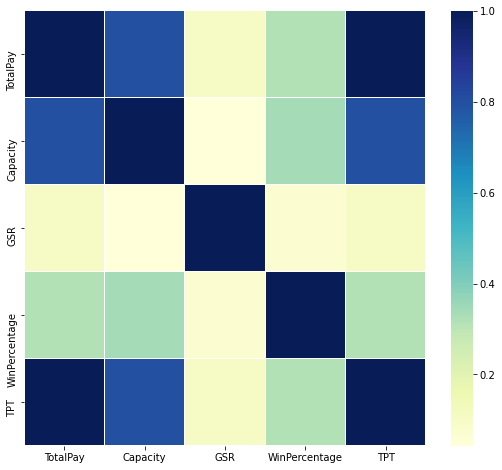

In [ ]:
#heatmap
corrmat = coach.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

Top Conferences

In [ ]:
# Resource:Athlon Sports. (2020) College Football 2020 Conference Power Rankings.
# Retrieved October 26, 2020 from athlonsports.com/college-football/college-football-2020-conference-power-rankings.
# Top 5 conference column
coach = coach.assign(top5 = coach['Conference'])
coach.top5 = coach.top5.replace({"SEC": "Y"})
coach.top5 = coach.top5.replace({"Big Ten": "Y"})
coach.top5 = coach.top5.replace({"ACC": "Y"})
coach.top5 = coach.top5.replace({"Big 12": "Y"})
coach.top5 = coach.top5.replace({"Pac-12": "Y"})
coach.loc[(coach.top5 != 'Y'),'top5']='N'
coach['top5'].astype('category')

# A column for each conference
coach['Mt. West'] = coach['Conference'].apply(lambda x: 1 if x == 'Mt. West' else 0)
coach['Mt. West'].astype('float')

coach['MAC'] = coach['Conference'].apply(lambda x: 1 if x == 'MAC' else 0)
coach['MAC'].astype('float')

coach['SEC'] = coach['Conference'].apply(lambda x: 1 if x == 'SEC' else 0)
coach['SEC'].astype('float')

coach['C-USA'] = coach['Conference'].apply(lambda x: 1 if x == 'C-USA' else 0)
coach['C-USA'].astype('float')

coach['Sun Belt'] = coach['Conference'].apply(lambda x: 1 if x == 'Sun Belt' else 0)
coach['Sun Belt'].astype('float')

coach['Pac-12'] = coach['Conference'].apply(lambda x: 1 if x == 'Pac-12' else 0)
coach['Pac-12'].astype('float')

coach['Ind.'] = coach['Conference'].apply(lambda x: 1 if x == 'Ind.' else 0)
coach['Ind.'].astype('float')

coach['ACC'] = coach['Conference'].apply(lambda x: 1 if x == 'ACC' else 0)
coach['ACC'].astype('float')

coach['AAC'] = coach['Conference'].apply(lambda x: 1 if x == 'AAC' else 0)
coach['AAC'].astype('float')

coach['Big Ten'] = coach['Conference'].apply(lambda x: 1 if x == 'Big Ten' else 0)
coach['Big Ten'].astype('float')

coach['Big 12'] = coach['Conference'].apply(lambda x: 1 if x == 'Big 12' else 0)
coach['Big 12'].astype('float')

19     0.0
29     0.0
69     0.0
59     0.0
113    0.0
      ... 
4      0.0
52     0.0
24     0.0
8      0.0
53     0.0
Name: Big 12, Length: 125, dtype: float64

Superfan Schools

In [ ]:
coach = coach.assign(superfan = coach['School'])
coach.superfan = coach.superfan.replace({"LSU": "Y"})
coach.superfan = coach.superfan.replace({"Alabama": "Y"})
coach.superfan = coach.superfan.replace({"Michigan": "Y"})
coach.superfan = coach.superfan.replace({"Clemson": "Y"})
coach.superfan = coach.superfan.replace({"Oklahoma": "Y"})
coach.superfan = coach.superfan.replace({"Georgia": "Y"})
coach.superfan = coach.superfan.replace({"Notre Dame": "Y"})
coach.superfan = coach.superfan.replace({"Auburn": "Y"})
coach.superfan = coach.superfan.replace({"Texas": "Y"})
coach.superfan = coach.superfan.replace({"Nebraska": "Y"})
coach.superfan = coach.superfan.replace({"Tennessee": "Y"})
coach.superfan = coach.superfan.replace({"Penn State": "Y"})
coach.superfan = coach.superfan.replace({"Florida": "Y"})
coach.superfan = coach.superfan.replace({"Florida State": "Y"})
coach.superfan = coach.superfan.replace({"Texas A&M": "Y"})
coach.superfan = coach.superfan.replace({"Wisconsin": "Y"})
coach.superfan = coach.superfan.replace({"South Carolina": "Y"})
coach.superfan = coach.superfan.replace({"Oregon": "Y"})
coach.loc[(coach.superfan != 'Y'),'superfan']='N'
coach['superfan'].astype('category')

0      N
1      N
2      Y
3      N
4      N
      ..
124    N
125    N
126    N
127    Y
128    N
Name: superfan, Length: 125, dtype: category
Categories (2, object): ['N', 'Y']

Descriptive Viz

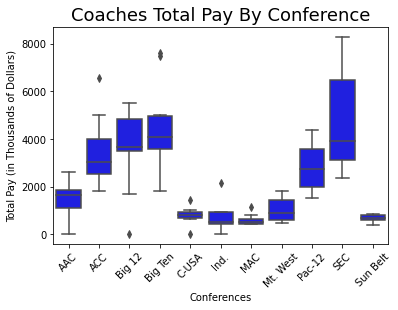

In [ ]:
#Boxplot By Conference
coach.sort_values('Conference', inplace=True, ascending=True)
bp = sns.boxplot(x="Conference",
                         y="TPT",
                         data=coach,
                         color = "blue")

#add title, xlabel and y label
plt.title('Coaches Total Pay By Conference', fontsize = 18)
plt.xlabel('Conferences')
plt.ylabel('Total Pay (in Thousands of Dollars)')
#rotate names to reduce overlap
bp.set_xticklabels(bp.get_xticklabels(),rotation=45)
plt.show()


[Text(0, 0, 'MAC'),
 Text(0, 0, 'Ind.'),
 Text(0, 0, 'Sun Belt'),
 Text(0, 0, 'C-USA'),
 Text(0, 0, 'Mt. West'),
 Text(0, 0, 'AAC'),
 Text(0, 0, 'Pac-12'),
 Text(0, 0, 'ACC'),
 Text(0, 0, 'Big 12'),
 Text(0, 0, 'SEC'),
 Text(0, 0, 'Big Ten')]

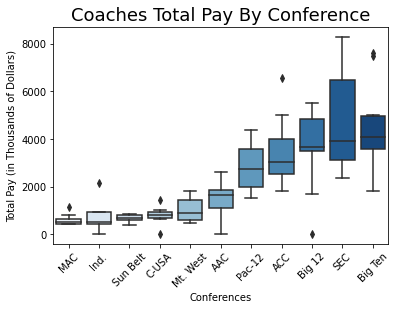

In [ ]:
grouped = coach.loc[:,['Conference', 'TPT']] \
    .groupby(['Conference']) \
    .median() \
    .sort_values(by='TPT')

bp = sns.boxplot(x="Conference",
                         y="TPT",
                         data=coach,order=grouped.index,
                         palette="Blues")
plt.title('Coaches Total Pay By Conference', fontsize = 18)
plt.xlabel('Conferences')
plt.ylabel('Total Pay (in Thousands of Dollars)')
bp.set_xticklabels(bp.get_xticklabels(),rotation=45)

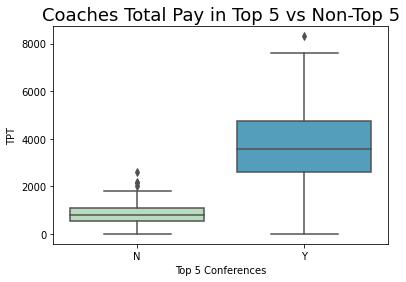

In [ ]:
bp = sns.boxplot(x="top5",
                         y="TPT",palette="GnBu",
                         data=coach
                         )
#add title, xlabel and y label
plt.title('Coaches Total Pay in Top 5 vs Non-Top 5', fontsize = 18)
plt.xlabel('Top 5 Conferences')
plt.show()

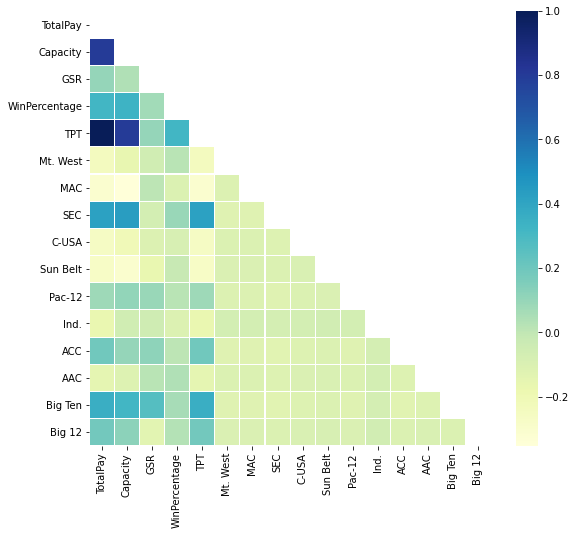

In [ ]:
#heatmap
corrmat = coach.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrmat, mask=mask,ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

Text(0.5, 0.98, 'Total Pay vs. GSR (by Conference)')

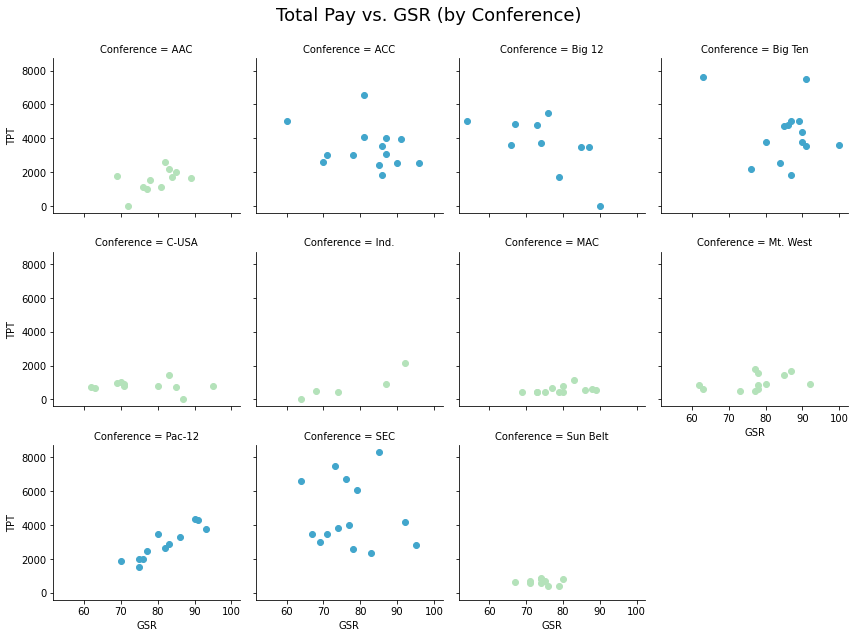

In [ ]:
g = sns.FacetGrid(coach, col="Conference", col_wrap=4, hue="top5", palette="GnBu")
g.map(plt.scatter, "GSR","TPT", alpha=1);
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Pay vs. GSR (by Conference)',fontsize = 18)

Text(0.5, 0.98, 'Total Pay vs. Capacity (by Conference)')

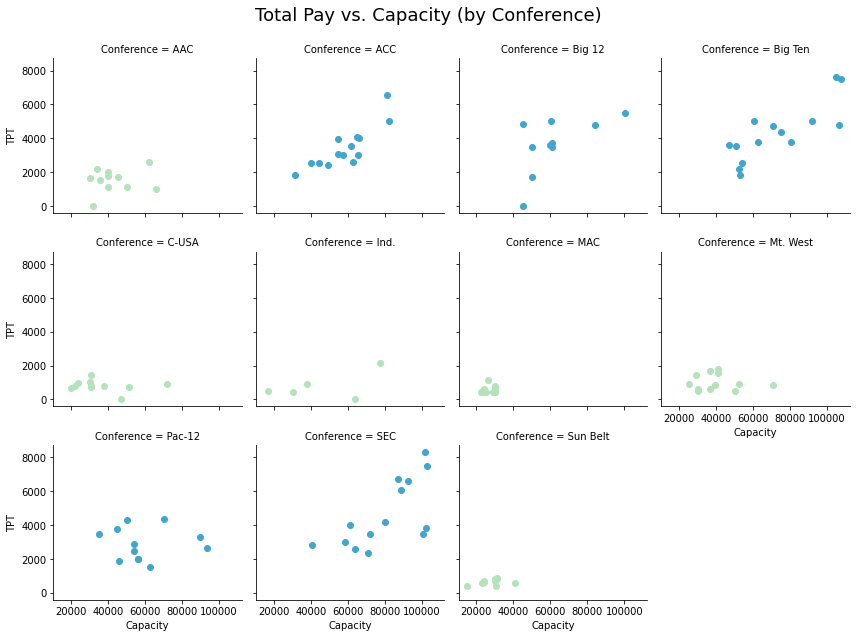

In [ ]:
g = sns.FacetGrid(coach, col="Conference", col_wrap=4, hue="top5", palette="GnBu")
g.map(plt.scatter, "Capacity","TPT", alpha=1);
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Pay vs. Capacity (by Conference)',fontsize = 18)

Text(0.5, 0.98, 'Total Pay vs. Win Percentage (by Conference)')

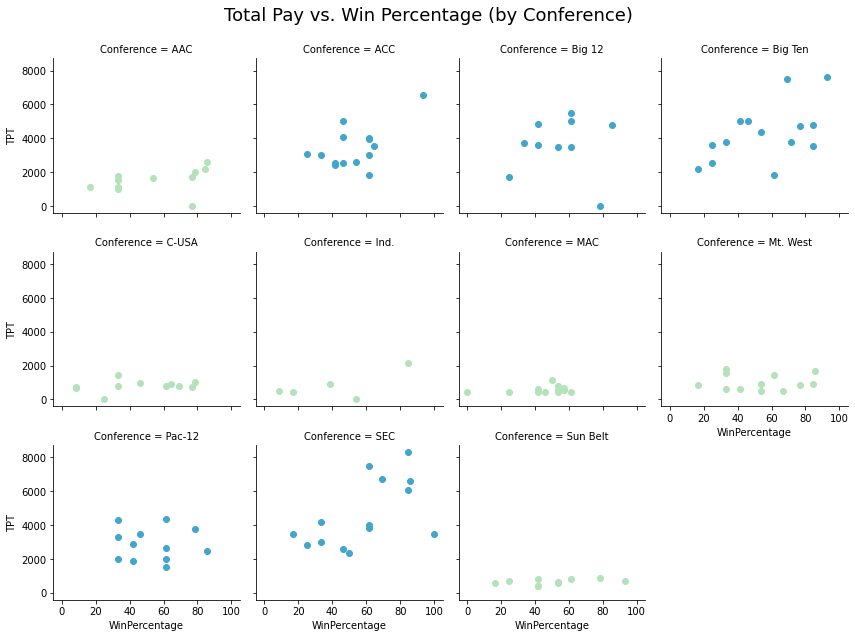

In [ ]:
g = sns.FacetGrid(coach, col="Conference", col_wrap=4, hue="top5", palette="GnBu")
g.map(plt.scatter, "WinPercentage","TPT", alpha=1);
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Pay vs. Win Percentage (by Conference)',fontsize = 18)

Step 6: Initial analysis

In [ ]:
# Split data
np.random.seed(1234)
coach['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach))
train = coach[coach['runiform'] >= 0.33]
test = coach[coach['runiform'] < 0.33]

# check training data frame

print('\ntrain dataframe (rows, columns): ',train.shape)


# check test data frame
print('\ntest dataframe (rows, columns): ',test.shape)

# models to investigate
m1 = str('TotalPay ~ WinPercentage') #Single Regression
m2 = str('TotalPay ~ Capacity +  WinPercentage') 
m3 = str('TotalPay ~ WinPercentage + Capacity + GSR') #Modeled on those with the a correlation relationship
m4 = str('TotalPay ~ top5 + superfan + Capacity')
m5 = str('TotalPay ~ top5 + superfan + Capacity + WinPercentage')


train dataframe (rows, columns):  (90, 24)

test dataframe (rows, columns):  (35, 24)


Step 7: Regressional Model

In [ ]:
# M1: fit the model to the training set
train_m1_fit = smf.ols(m1,data=train).fit()
print(train_m1_fit.summary())
# training set predictions 
train['predicted_TotalPay'] = train_m1_fit.fittedvalues
test['predicted_TotalPay'] = train_m1_fit.predict(test)

# what is the response variance RMSE
rmse = round(np.power(test['TotalPay'].corr(test['predicted_TotalPay']),2),3)
print("M1: Proportion of Test Set Variance Accounted for: {0}".format(rmse))

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     8.300
Date:                Sat, 17 Oct 2020   Prob (F-statistic):            0.00498
Time:                        17:33:42   Log-Likelihood:                -1424.3
No. Observations:                  90   AIC:                             2853.
Df Residuals:                      88   BIC:                             2858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.156e+06   4.91e+05      2.355

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# M2: fit the model to the training set
train_m2_fit = smf.ols(m2,data=train).fit()
print(train_m2_fit.summary())

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the model
print("\nM2: Most significant attribute: '{0}' with value: {1}".format(train_m2_fit.params[1:].idxmax(),round(train_m2_fit.params[1:].max()),0))
# training set predictions 
train['predicted_TotalPay'] = train_m2_fit.fittedvalues
test['predicted_TotalPay'] = train_m2_fit.predict(test)

# what is the response variance 
rmse = round(np.power(test['TotalPay'].corr(test['predicted_TotalPay']),2),3)
print("M2: Proportion of Test Set Variance Accounted for: {0}".format(rmse))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     55.46
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           2.96e-16
Time:                        17:33:50   Log-Likelihood:                -1391.4
No. Observations:                  90   AIC:                             2789.
Df Residuals:                      87   BIC:                             2796.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.521e+05   4.06e+05     -2.347

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# M3: fit the model to the training set
train_m3_fit = smf.ols(m3,data=train).fit()
print(train_m3_fit.summary())

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the model
print("\nM3: Most significant attribute: '{0}' with value: {1}".format(train_m3_fit.params[1:].idxmax(),round(train_m3_fit.params[1:].max()),0))
# training set predictions 
train['predicted_TotalPay'] = train_m3_fit.fittedvalues
test['predicted_TotalPay'] = train_m3_fit.predict(test)

# what is the response variance 
rmse = round(np.power(test['TotalPay'].corr(test['predicted_TotalPay']),2),3)
print("M3: Proportion of Test Set Variance Accounted for: {0}".format(rmse))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     38.31
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           8.08e-16
Time:                        17:33:53   Log-Likelihood:                -1390.2
No. Observations:                  90   AIC:                             2788.
Df Residuals:                      86   BIC:                             2798.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.648e+06   1.18e+06     -2.237

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# M4: fit the model to the training set
train_m4_fit = smf.ols(m4,data=train).fit()
print(train_m4_fit.summary())

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the motel
print("\nM4: Most significant attribute: '{0}' with value: {1}".format(train_m4_fit.params[1:].idxmax(),round(train_m4_fit.params[1:].max()),0))
# training set predictions 
train['predicted_TotalPay'] = train_m4_fit.fittedvalues
test['predicted_TotalPay'] = train_m4_fit.predict(test)

# what is the response variance RMSE, when predicting out-of-sample
rmse = round(np.power(test['TotalPay'].corr(test['predicted_TotalPay']),2),3)
print("M4: Proportion of Test Set Variance Accounted for: {0}".format(rmse))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     85.33
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.08e-25
Time:                        17:33:58   Log-Likelihood:                -1366.2
No. Observations:                  90   AIC:                             2740.
Df Residuals:                      86   BIC:                             2750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.529e+05   3.29e+05      1.378

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# M5: fit the model to the training set
train_m5_fit = smf.ols(m5,data=train).fit()
print(train_m5_fit.summary())

# which parameter has the most significant effect on TotalPay?
# look at each parameter in the motel
print("\nM5: Most significant attribute: '{0}' with value: {1}".format(train_m5_fit.params[1:].idxmax(),round(train_m5_fit.params[1:].max()),0))
# training set predictions 
train['predicted_TotalPay'] = train_m5_fit.fittedvalues
test['predicted_TotalPay'] = train_m5_fit.predict(test)

# what is the response variance RMSE, when predicting out-of-sample
rmse = round(np.power(test['TotalPay'].corr(test['predicted_TotalPay']),2),3)
print("M5: Proportion of Test Set Variance Accounted for: {0}".format(rmse))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     63.66
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           8.90e-25
Time:                        17:34:01   Log-Likelihood:                -1366.0
No. Observations:                  90   AIC:                             2742.
Df Residuals:                      85   BIC:                             2755.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.18e+05   3.92e+05      0.811

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [91]:
# specify a simple model with Team Conference
m6 = str('TotalPay ~ Q("SEC") + Q("C-USA") + Q("Sun Belt") + Q("Pac-12") + Q("Ind.") + Q("ACC") + Q("AAC") + Q("Big Ten") + Q("Big 12") + Q("Mt. West") + Q("MAC") + Capacity + WinPercentage + GSR')

# fit the model to the training set
train_m6_fit = smf.ols(m6, data = train).fit()

# summary of model fit to the training set
print(train_m6_fit.summary())

# print the coefficients
print(train_m6_fit.params)

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     15.42
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           2.32e-16
Time:                        18:55:09   Log-Likelihood:                -1370.2
No. Observations:                  90   AIC:                             2768.
Df Residuals:                      76   BIC:                             2803.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.444e+05   1.14e+06      0.127

## Questions
Question 1: What is the recommended salary for the Syracuse football coach?

In [83]:
coach.loc[(coach.top5 != 'Y'),'top5']='0'
coach.loc[(coach.top5 != '0'),'top5']='1'
coach['top5'].astype('float')
coach.loc[(coach.superfan != 'Y'),'superfan']='0'
coach.loc[(coach.superfan != '0'),'superfan']='1'
coach['superfan'].astype('float')
np.random.seed(1234)
coach['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coach))
train = coach[coach['runiform'] >= 0.33]
test = coach[coach['runiform'] < 0.33]

#linearRegression from SKlearn
lin_reg = LinearRegression()

# train
y_train = train[['TotalPay']]
X_train = train[['top5' , 'superfan' , 'Capacity' , 'WinPercentage']]
lin_reg.fit(X_train, y_train)
                             

#Predict
y_test = test[['TotalPay']]
X_test = test[['top5' , 'superfan' , 'Capacity' , 'WinPercentage']]
y_pred = lin_reg.predict(X_test)

s = coach[coach['School'] == 'Syracuse']
lin_reg.predict(s[['top5' , 'superfan' , 'Capacity' , 'WinPercentage']])

spred = lin_reg.predict(s[['top5' , 'superfan' , 'Capacity' , 'WinPercentage']])


# print amount
print("Syracuse's Coach Salary should be ",(spred))
print('${:,.2f}'.format(2175410.29571167))

Syracuse's Coach Salary should be  [[2175410.29571167]]
$2,175,410.30


Question 2: What would his salary be if we were still in the Big East? What if we went to the Big
Ten?

In [93]:
print(train_m6_fit.params)
print(train_m6_fit.params[6]) #Coefficiant for ACC
print(train_m6_fit.params[7]) #Coefficiant for AAC
acc = train_m6_fit.params[6]
aac = train_m6_fit.params[7]
spredbe=(spred-acc)+aac
print("Syracuse's Coach AAC Salary should be ",(spredbe))
print('${:,.2f}'.format(684477.80749561))

Intercept        1.444214e+05
Q("SEC")         1.313286e+06
Q("C-USA")      -9.215371e+05
Q("Sun Belt")   -8.073194e+05
Q("Pac-12")      4.968340e+05
Q("Ind.")       -1.564764e+06
Q("ACC")         1.106361e+06
Q("AAC")        -3.845710e+05
Q("Big Ten")     1.329477e+06
Q("Big 12")      1.182560e+06
Q("Mt. West")   -8.562356e+05
Q("MAC")        -7.496705e+05
Capacity         3.217775e+01
WinPercentage    5.977492e+03
GSR              1.559122e+03
dtype: float64
1106361.466654052
-384571.02156201063
Syracuse's Coach AAC Salary should be  [[684477.80749561]]
$684,477.81


In [96]:
print(train_m6_fit.params)
print(train_m6_fit.params[8]) #Coefficiant for B10
b10 = train_m6_fit.params[8]
spredb10=(spred-acc)+b10
print("Syracuse's Coach Big 10 Salary should be ",(spredb10))
print('${:,.2f}'.format(2398525.61801676))

Intercept        1.444214e+05
Q("SEC")         1.313286e+06
Q("C-USA")      -9.215371e+05
Q("Sun Belt")   -8.073194e+05
Q("Pac-12")      4.968340e+05
Q("Ind.")       -1.564764e+06
Q("ACC")         1.106361e+06
Q("AAC")        -3.845710e+05
Q("Big Ten")     1.329477e+06
Q("Big 12")      1.182560e+06
Q("Mt. West")   -8.562356e+05
Q("MAC")        -7.496705e+05
Capacity         3.217775e+01
WinPercentage    5.977492e+03
GSR              1.559122e+03
dtype: float64
1329476.7889591393
Syracuse's Coach Big 10 Salary should be  [[2398525.61801676]]
$2,398,525.62
